**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**


**Grupo 28** <br>
Docente: Laura Montes<br>

Integrantes:
*   Gustavo Alvarez Lupu
*   Laura Hayas
*   Maria Emilia Santacruz
*   Nicolás Ambrosis


----

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
#Importacion de librerias.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import io
import seaborn
seaborn.set_context('talk')

In [ ]:
#Se carga el dataframe obtenido en el entregable parte 1.

from google.colab import files
uploaded = files.upload()


# Link al archivo merge_df: 
# https://drive.google.com/file/d/1avULIDnCbjA3vxfBMfY3Q7A-ct4h7Wzo/view?usp=sharing


Saving merge_df.csv to merge_df (4).csv


In [ ]:
#Se lee el archivo csv de la celda anterior.
file_key = 'merge_df.csv'
df = pd.read_csv(io.StringIO(uploaded[file_key].decode('utf-8')))

#Se visualizan las primeras filas del dataframe.
df.head()

,Suburb,Rooms,Type,Price,Distance,Postcode,Landsize,BuildingArea,YearBuilt,Propertycount,zipcode,price
0,Abbotsford,2,h,1480000.0,2.5,3067.0,202.0,NaN,NaN,4019.0,3067.0,130.624031
1,Abbotsford,2,h,1035000.0,2.5,3067.0,156.0,79.0,1900.0,4019.0,3067.0,130.624031
2,Abbotsford,3,h,1465000.0,2.5,3067.0,134.0,150.0,1900.0,4019.0,3067.0,130.624031
3,Abbotsford,3,h,850000.0,2.5,3067.0,94.0,NaN,NaN,4019.0,3067.0,130.624031
4,Abbotsford,4,h,1600000.0,2.5,3067.0,120.0,142.0,2014.0,4019.0,3067.0,130.624031


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila para variables categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
#Se realiza una copia del dataframe y en la copia se eliminan las columnas:
# BuildingArea, YearBuilt, zipcode, price.

df_2 = df.copy()
df_2 = df_2.drop(columns = ['BuildingArea', 'YearBuilt','zipcode','price'])


#Con la funcion shape se comprueba que se hayan eliminado las 4 columnas.
df.shape, df_2.shape

((13580, 12), (13580, 8))

In [ ]:
#Se visualizan los tipos de datos de las columnas del dataframe.
df_2.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Distance         float64
Postcode         float64
Landsize         float64
Propertycount    float64
dtype: object

In [ ]:
#Se convierte el tipo de dato de la columna en object, ya que se considera que Postcode es una variable categorica.
df_2['Postcode'] = df_2.Postcode.astype('str')

In [ ]:
#Se comprueba que se haya realizado el cambio correctamente.
df_2.Postcode.dtypes

dtype('O')

In [ ]:
#Visualizacion de las variables categoricas
df_2.select_dtypes(include=object, exclude=None).columns

Index(['Suburb', 'Type', 'Postcode'], dtype='object')

In [ ]:
#Visualizacion de todas las columnas del dataframe.
df_2.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Landsize',
       'Propertycount'],
      dtype='object')

In [ ]:
#Se convierte el dataframe en un diccionario.

dictionary = list(df_2.T.to_dict().values())
dictionary[:2]

[{'Distance': 2.5,
  'Landsize': 202.0,
  'Postcode': '3067.0',
  'Price': 1480000.0,
  'Propertycount': 4019.0,
  'Rooms': 2,
  'Suburb': 'Abbotsford',
  'Type': 'h'},
 {'Distance': 2.5,
  'Landsize': 156.0,
  'Postcode': '3067.0',
  'Price': 1035000.0,
  'Propertycount': 4019.0,
  'Rooms': 2,
  'Suburb': 'Abbotsford',
  'Type': 'h'}]

In [ ]:
#Se realiza el encoding del dataframe convertido en diccionario utilizando la clase DictVectorizer.

from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)

#Se obtiene una matriz.
feature_matrix = vec.fit_transform(dictionary)


In [ ]:
#Se visualiza la dimension de la matriz obtenida.
np.shape(feature_matrix)

(13580, 520)

In [ ]:
#Visualizacion de la matriz.
feature_matrix

array([[  2.5, 202. ,   0. , ...,   1. ,   0. ,   0. ],
       [  2.5, 156. ,   0. , ...,   1. ,   0. ,   0. ],
       [  2.5, 134. ,   0. , ...,   1. ,   0. ,   0. ],
       ...,
       [  6.8, 436. ,   0. , ...,   1. ,   0. ,   0. ],
       [  6.8, 866. ,   0. , ...,   1. ,   0. ,   0. ],
       [  6.3, 362. ,   0. , ...,   1. ,   0. ,   0. ]])

In [ ]:
#Visualizacion de las features de la matriz.
vec.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['Distance',
 'Landsize',
 'Postcode=3000.0',
 'Postcode=3002.0',
 'Postcode=3003.0',
 'Postcode=3006.0',
 'Postcode=3008.0',
 'Postcode=3011.0',
 'Postcode=3012.0',
 'Postcode=3013.0',
 'Postcode=3015.0',
 'Postcode=3016.0',
 'Postcode=3018.0',
 'Postcode=3019.0',
 'Postcode=3020.0',
 'Postcode=3021.0',
 'Postcode=3022.0',
 'Postcode=3023.0',
 'Postcode=3024.0',
 'Postcode=3025.0',
 'Postcode=3027.0',
 'Postcode=3028.0',
 'Postcode=3029.0',
 'Postcode=3030.0',
 'Postcode=3031.0',
 'Postcode=3032.0',
 'Postcode=3033.0',
 'Postcode=3034.0',
 'Postcode=3036.0',
 'Postcode=3037.0',
 'Postcode=3038.0',
 'Postcode=3039.0',
 'Postcode=3040.0',
 'Postcode=3041.0',
 'Postcode=3042.0',
 'Postcode=3043.0',
 'Postcode=3044.0',
 'Postcode=3046.0',
 'Postcode=3047.0',
 'Postcode=3048.0',
 'Postcode=3049.0',
 'Postcode=3051.0',
 'Postcode=3052.0',
 'Postcode=3053.0',
 'Postcode=3054.0',
 'Postcode=3055.0',
 'Postcode=3056.0',
 'Postcode=3057.0',
 'Postcode=3058.0',
 'Postcode=3059.0',
 'Postcode=306

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
#Se convierten las columnas YearBuilt y BuildingArea en una matriz.
two_columns = df[['YearBuilt','BuildingArea']].to_numpy()

In [ ]:
#Se concatena la matriz obtenida a partir de las dos columnas anteriores con la matriz obtenida luego del encoding.

concatenate_array =np.concatenate((feature_matrix, two_columns), axis=1)


#Se visualiza la dimension de la matriz.
np.shape(concatenate_array)

(13580, 522)

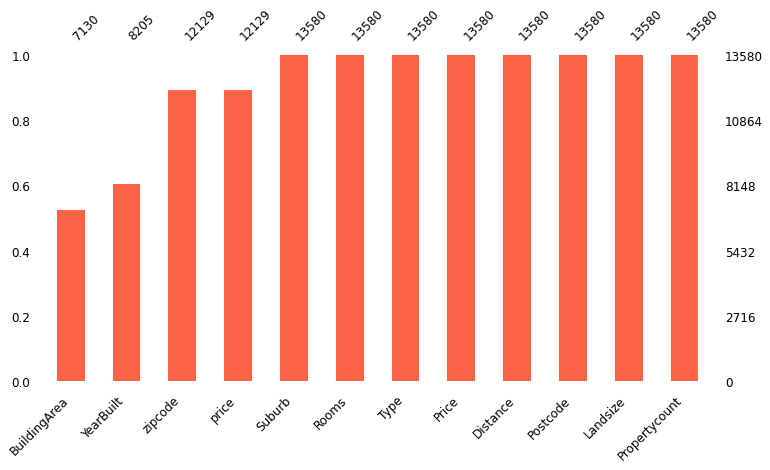

In [ ]:
#Visualizacion cantidad de faltantes 
import missingno as msno
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato') 

####Imputacion de 2 variables unicamente.



In [ ]:
#Es necesario estandarizar los datos previamente de las columnas a imputar.
from sklearn.preprocessing import StandardScaler

#Se obtiene una matriz.
matrix_columns = StandardScaler().fit_transform(two_columns) 

In [ ]:
#Se imputan los datos faltantes de las 2 columnas
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

#Se copia la matriz.
matrix_iterative = matrix_columns.copy() 

#Se aplica el metodo IterativeImputer a la matriz y se obtiene una matriz.
iterative_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
matrix_iterative = iterative_imputer.fit_transform(matrix_iterative) 

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#Se convierte la matriz a dataframe.
df_iterative = pd.DataFrame(matrix_iterative, columns=['YearBuilt','BuildingArea'])

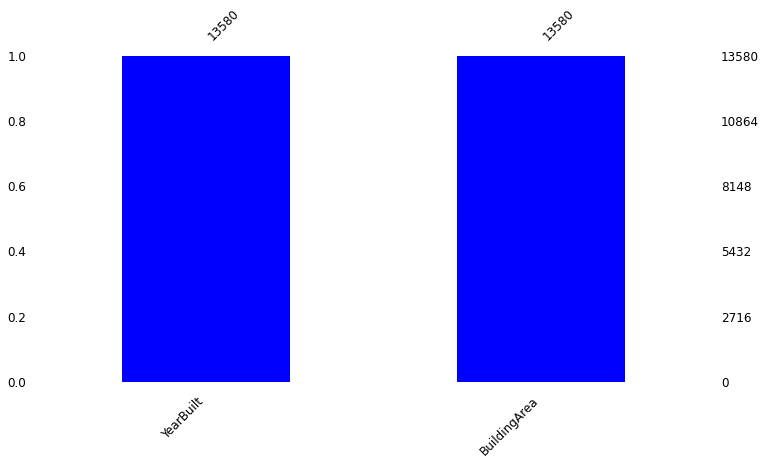

In [ ]:
#Visualizacion datos imputados. 
import missingno as msno
msno.bar(df_iterative,figsize=(12, 6), sort="ascending",fontsize=12, color='blue') 

In [ ]:
#Se visualizan los datos estandarizados tanto de YearBuilt como de BuildingArea.
print(df_iterative.YearBuilt)
print(df_iterative.BuildingArea)

0       -1.429624
1       -1.735488
2       -1.735488
3       -1.429624
4        1.323150
           ...   
13575    0.437755
13576    0.813377
13577    0.867038
13578   -1.198885
13579   -1.198885
Name: YearBuilt, Length: 13580, dtype: float64
0        0.040357
1       -0.134881
2       -0.003637
3        0.040357
4       -0.018425
           ...   
13575    0.020024
13576   -0.035062
13577   -0.051698
13578    0.009302
13579   -0.073881
Name: BuildingArea, Length: 13580, dtype: float64


####Imputacion de 2 variables usando todo el dataframe.

In [ ]:
#Se remueven las columnas Postcode, Suburb, Type y Zipcode para realizar la imputacion utilizando la mayor de cantidad de columnas posibles del dataframe.
df_impute_total = df.drop(['Postcode','Suburb','Type','zipcode'], axis=1)
df_impute_total

,Rooms,Price,Distance,Landsize,BuildingArea,YearBuilt,Propertycount,price
0,2,1480000.0,2.5,202.0,NaN,NaN,4019.0,130.624031
1,2,1035000.0,2.5,156.0,79.0,1900.0,4019.0,130.624031
2,3,1465000.0,2.5,134.0,150.0,1900.0,4019.0,130.624031
3,3,850000.0,2.5,94.0,NaN,NaN,4019.0,130.624031
4,4,1600000.0,2.5,120.0,142.0,2014.0,4019.0,130.624031
...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,652.0,NaN,1981.0,7392.0,124.026455
13576,3,1031000.0,6.8,333.0,133.0,1995.0,6380.0,191.094595
13577,3,1170000.0,6.8,436.0,NaN,1997.0,6380.0,191.094595
13578,4,2500000.0,6.8,866.0,157.0,1920.0,6380.0,191.094595


In [ ]:
#Es necesario estandarizar los datos previamente de las columnas a imputar.
from sklearn.preprocessing import StandardScaler

#Luego de que el metodo pasa por el metodo fit_transform se obtiene una matriz.
matrix_total = StandardScaler().fit_transform(df_impute_total)
matrix_total 

array([[-0.98146337,  0.63244803, -1.30148498, ...,         nan,
        -0.78462481, -0.02994874],
       [-0.98146337, -0.06363975, -1.30148498, ..., -1.73548779,
        -0.78462481, -0.02994874],
       [ 0.06487613,  0.6089844 , -1.30148498, ..., -1.73548779,
        -0.78462481, -0.02994874],
       ...,
       [ 0.06487613,  0.14753294, -0.56876052, ...,  0.86703758,
        -0.24538926,  1.14162225],
       [ 1.11121563,  2.22797508, -0.56876052, ..., -1.19888462,
        -0.24538926,  1.14162225],
       [ 1.11121563,  0.3274208 , -0.65396104, ..., -1.19888462,
        -0.20816122,  0.06664588]])

In [ ]:
#Se imputan los datos faltantes de las 2 columnas
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor


#Se copia la matriz anterior.
matrix_iterative_total = matrix_total.copy() 

iterative_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

matrix_iterative_total = iterative_imputer.fit_transform(matrix_iterative_total) 

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#Se convierte la matriz obtenida luego de la imputacion en un dataframe.
df_iterative_total = pd.DataFrame(matrix_iterative_total, columns=['Rooms','Price','Distance','Landsize','YearBuilt','BuildingArea','Propertycount','price'])

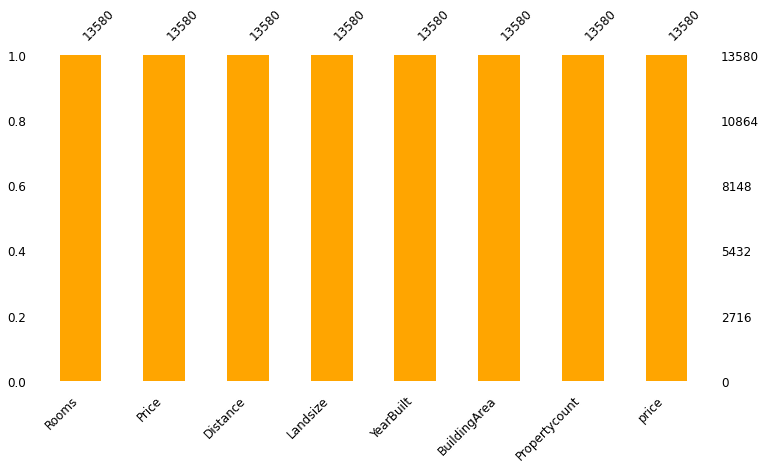

In [ ]:
#Visualizacion datos imputados. 
import missingno as msno
msno.bar(df_iterative_total ,figsize=(12, 6), sort="ascending",fontsize=12, color='orange') 

In [ ]:
#Se estandarizan las columnas originales (sin imputacion) para poder visualizarlas en el grafico.
df_standarized = pd.DataFrame(matrix_columns, columns=['YearBuilt','BuildingArea']) 

####Gráfico Building Area Standarized
Se puede observar en el grafico que cuando se realiza una imputacion utilizando solo las 2 variables involucradas (YearBuilt y BuildingArea) se presentan datos imputados muy cercanos entre si y a la media,
mientras que para el caso de la imputacion utilizando toda la matriz se tiene que los valores imputados se encuentran mas alejados  entre si y mas alejados de la media.
Llegando a la conclusion que agregar mas variables al imputar no es necesariamente beneficioso ya que si se agrega informacion que no esta fuertemente relacionada a la variable a imputar se mete ruido y no se tienen valores cercanos a los originales.

Text(0.5, 0, 'Building_Area_Standarized')

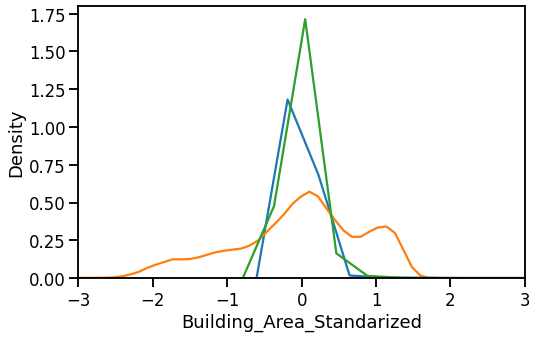

In [ ]:
#Se grafica la distribucion de los datos de BuildingArea para los 3 casos vistos:
#Previo a la imputacion(Green)
#Imputacion utilizando solo 2 columnas.(Blue)
#Imputacion utilizando todo el dataframe.(Orange)
fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=df_iterative, x='BuildingArea') 
seaborn.kdeplot(data=df_iterative_total, x='BuildingArea') 
seaborn.kdeplot(data=df_standarized , x='BuildingArea') 
plt.xlim(-3, 3)
plt.xlabel('Building_Area_Standarized')

######Gráfico Year Built Standarized
Se puede observar en el grafico que cuando se realiza una imputacion utilizando solo las 2 variables involucradas (YearBuilt y BuildingArea) se presentan datos imputados muy cercanos entre si y alejados de la media,
mientras que para el caso de la imputacion utilizando toda la matriz se tiene que los valores imputados estan todos muy cercanos a la media y tambien entre si, teniendo una distribucion mas cercana a la original.

Text(0.5, 0, 'Year_Built_Standarized')

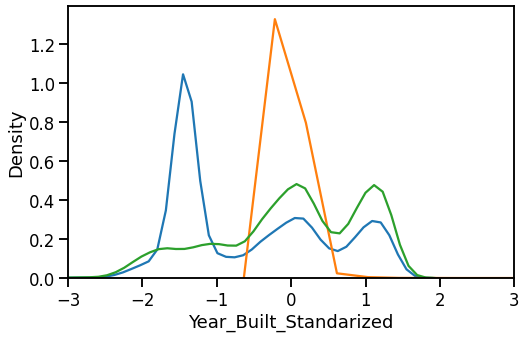

In [ ]:
#Se grafica la distribucion de los datos de YearBuilt para los 3 casos vistos:
#Previo a la imputacion(Green)
#Imputacion utilizando solo 2 columnas.(Blue)
#Imputacion utilizando todo el dataframe.(Orange)
fig = plt.figure(figsize=(8, 5))
seaborn.kdeplot(data=df_iterative, x='YearBuilt') 
seaborn.kdeplot(data=df_iterative_total, x='YearBuilt') 
seaborn.kdeplot(data=df_standarized , x='YearBuilt')
plt.xlim(-3, 3)
plt.xlabel('Year_Built_Standarized')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [ ]:
#Se convierte el dataframe manteniendo unicamente las columnas imputadas en una matriz.
#Se concatena esta matriz nueva con la matriz obtenida en el encoding.

two_columns_imputed = df_iterative_total[['YearBuilt','BuildingArea']].to_numpy()

concatenate_array_imputed =np.concatenate((feature_matrix, two_columns_imputed), axis=1)

np.shape(concatenate_array_imputed)

(13580, 522)

In [ ]:
#Se normalizan los datos para una correcta reduccion de dimensionalidad.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit_transform(concatenate_array_imputed)

In [ ]:
#Se realiza la reduccion de dimensionalidad utilizando el metodo PCA
#Se propone la utilizacion de 30 componentes principales.

from sklearn.decomposition import PCA

pca = PCA(n_components = 30) 

principalComponents = pca.fit_transform(scaler)

In [ ]:
#Se obtiene el porcentaje de varianza explicada para 30 componentes principales.
pca.explained_variance_ratio_.sum()*100

51.75671679081428

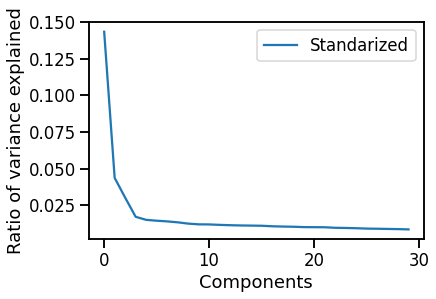

In [ ]:
#Se realiza un grafico de linea para visualizar el porcentaje de varianza explicada en funcion de la cantidad de componentes principales utilizados.
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Standarized')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
#Se convierte el resultado de la reduccion de dimensionalidad, que es una matriz de 13580 filas con 10 columnas (las 10 componentes principales), en un dataframe.
df_new1 = pd.DataFrame(principalComponents[:, :10], columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5','PCA_6','PCA_7','PCA_8','PCA_9','PCA_10'])

#Se visuliza el resultado.
df_new1.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,-0.369989,-0.054080,-0.140374,-0.002002,-0.062019,-0.011647,-0.014005,0.020187,0.004710,-0.020775
1,-0.367349,-0.054267,-0.139811,-0.004378,-0.062106,-0.011189,-0.014747,0.018024,0.001602,-0.022638
2,-0.380857,-0.049720,-0.141433,-0.006336,-0.058585,-0.009378,-0.012126,0.018048,0.006678,-0.017683
3,-0.376280,-0.049080,-0.140620,-0.010835,-0.058351,-0.007967,-0.013075,0.013920,0.001837,-0.019905
4,-0.389653,-0.042431,-0.142572,-0.013742,-0.053990,-0.004785,-0.009754,0.013011,0.007955,-0.012842


In [ ]:
#Se convierte la matriz obtenida luego del encoding mas las dos columnas imputadas.
df_new2 = pd.DataFrame(concatenate_array_imputed, columns = vec.get_feature_names() + ['YearBuilt','BuildingArea'])

#Se visualiza el resultado.
df_new2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Distance,Landsize,Postcode=3000.0,Postcode=3002.0,Postcode=3003.0,Postcode=3006.0,Postcode=3008.0,Postcode=3011.0,Postcode=3012.0,Postcode=3013.0,...,Suburb=Wonga Park,Suburb=Wyndham Vale,Suburb=Yallambie,Suburb=Yarra Glen,Suburb=Yarraville,Type=h,Type=t,Type=u,YearBuilt,BuildingArea
0,2.5,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.099020,-1.896469
1,2.5,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.134881,-1.735488
2,2.5,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.003637,-1.735488
3,2.5,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.066117,-0.587157
4,2.5,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.018425,1.323150


In [ ]:
#Se concatenan los 2 dataframes obtenidos anteriormente.
df_final = pd.concat([df_new2,df_new1],axis=1)

#Se visualiza el resultado.
df_final.head()

,Distance,Landsize,Postcode=3000.0,Postcode=3002.0,Postcode=3003.0,Postcode=3006.0,Postcode=3008.0,Postcode=3011.0,Postcode=3012.0,Postcode=3013.0,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,2.5,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.369989,-0.054080,-0.140374,-0.002002,-0.062019,-0.011647,-0.014005,0.020187,0.004710,-0.020775
1,2.5,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.367349,-0.054267,-0.139811,-0.004378,-0.062106,-0.011189,-0.014747,0.018024,0.001602,-0.022638
2,2.5,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.380857,-0.049720,-0.141433,-0.006336,-0.058585,-0.009378,-0.012126,0.018048,0.006678,-0.017683
3,2.5,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.376280,-0.049080,-0.140620,-0.010835,-0.058351,-0.007967,-0.013075,0.013920,0.001837,-0.019905
4,2.5,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.389653,-0.042431,-0.142572,-0.013742,-0.053990,-0.004785,-0.009754,0.013011,0.007955,-0.012842


In [ ]:
#Se convierte el dataframe en un csv:

df_final.to_csv('dataframe_final.csv', index = False)

# Se descarga el archivo:

from google.colab import files

files.download('dataframe_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transformaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
